Library

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
# import tensorflow_datasets as tfds
import os
import zipfile
import shutil
import random
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from shutil import copyfile
from tensorflow.keras.preprocessing import image_dataset_from_directory

Load Data

In [7]:

local_zip='./archive.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')

zip_ref.close()

In [8]:
list_directory=os.listdir('./Vegetable Images')
print(list_directory)

['test', 'train', 'validation']


In [9]:
try:
    os.rename('Vegetable Images', 'dt_vegetables')
except:
    directory = "dt_vegetables"
    
    # Parent Directory 
    parent = "./"
    
    # Path 
    path = os.path.join(parent, directory) 
    shutil.rmtree(path)
    os.rename('Vegetable Images', 'dt_vegetables')

In [10]:
l_directory=os.listdir('./dt_vegetables')
print(l_directory)

['test', 'train', 'validation']


Data Exploration

In [11]:

file_directory='./dt_vegetables/'

for  item in l_directory:
  class_dir = os.path.join(file_directory,item)
  print(item ," : ",len(os.listdir(class_dir)),"File")

test  :  15 File
train  :  15 File
validation  :  15 File


In [12]:
image_directory='./dt_vegetables/train/'
list_dir=os.listdir(image_directory)
for  item in list_dir:
    class_dir = os.path.join(image_directory,item)
    print(item ," : ",len(os.listdir(class_dir)),"File")
    # print(item)


Bean  :  1000 File
Bitter_Gourd  :  1000 File
Bottle_Gourd  :  1000 File
Brinjal  :  1000 File
Broccoli  :  1000 File
Cabbage  :  1000 File
Capsicum  :  1000 File
Carrot  :  1000 File
Cauliflower  :  1000 File
Cucumber  :  1000 File
Papaya  :  1000 File
Potato  :  1000 File
Pumpkin  :  1000 File
Radish  :  1000 File
Tomato  :  1000 File


Bean


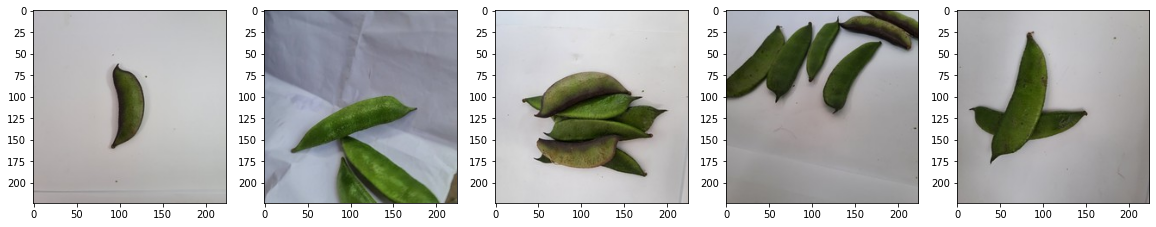

Bitter_Gourd


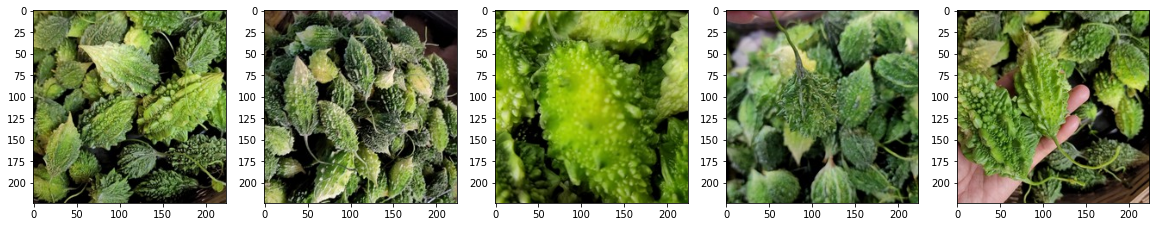

Bottle_Gourd


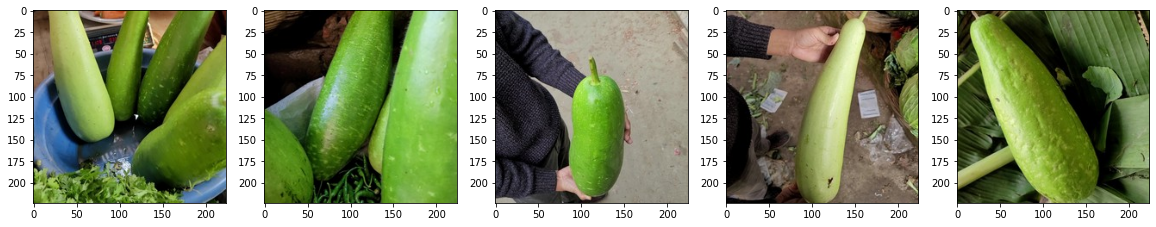

Brinjal


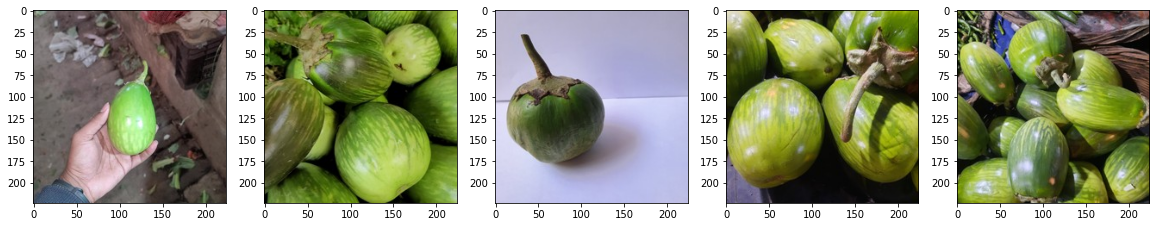

Broccoli


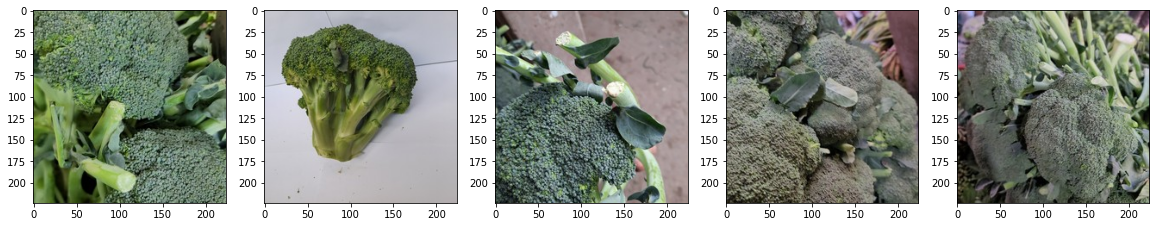

Cabbage


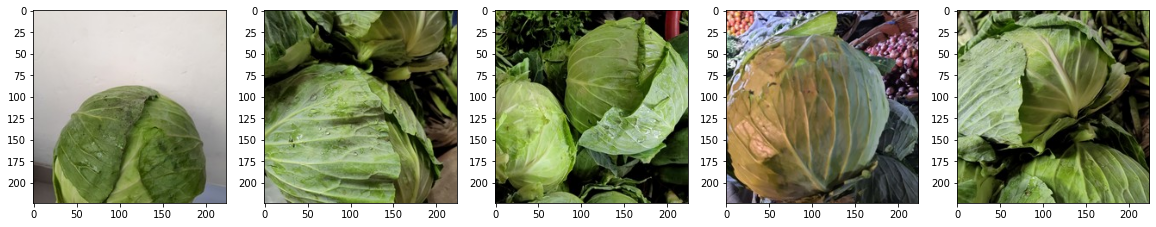

Capsicum


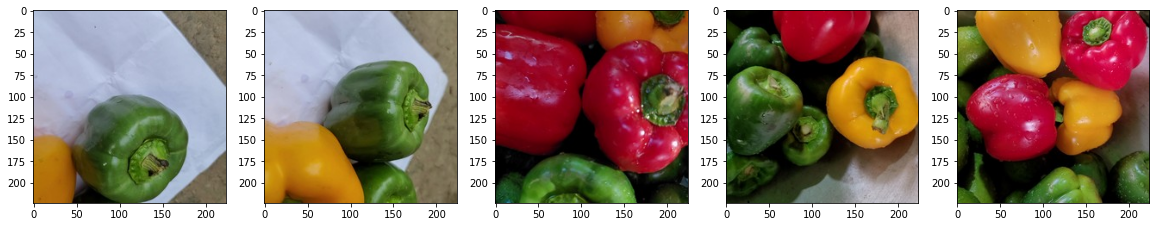

Carrot


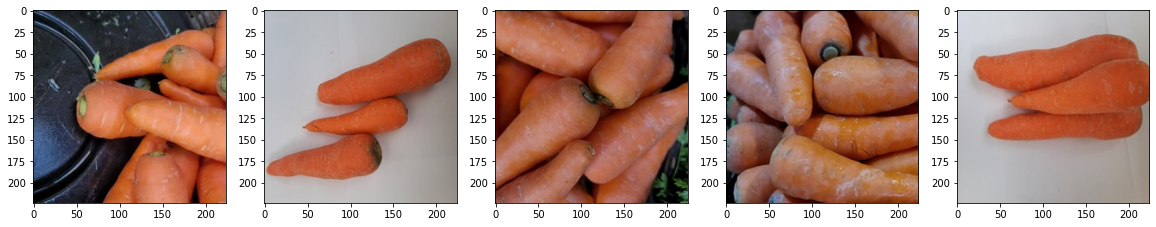

Cauliflower


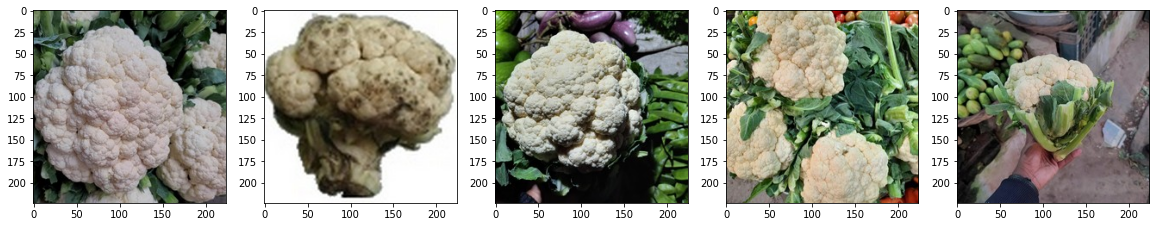

Cucumber


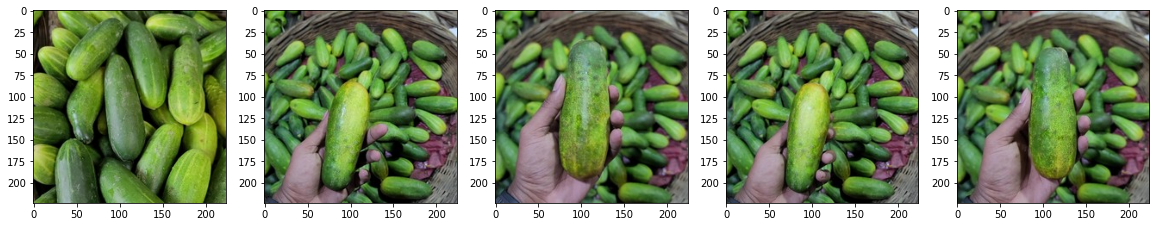

Papaya


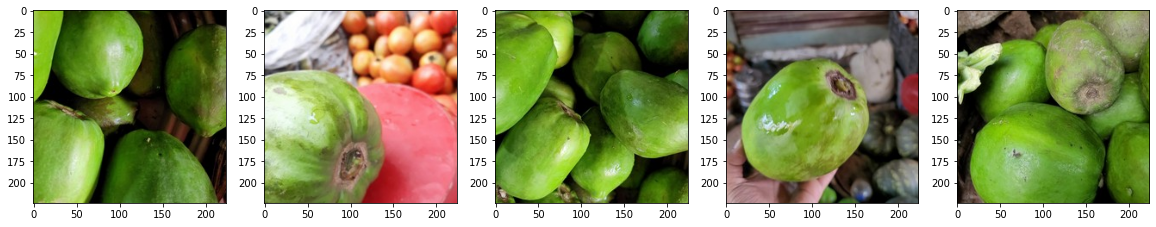

Potato


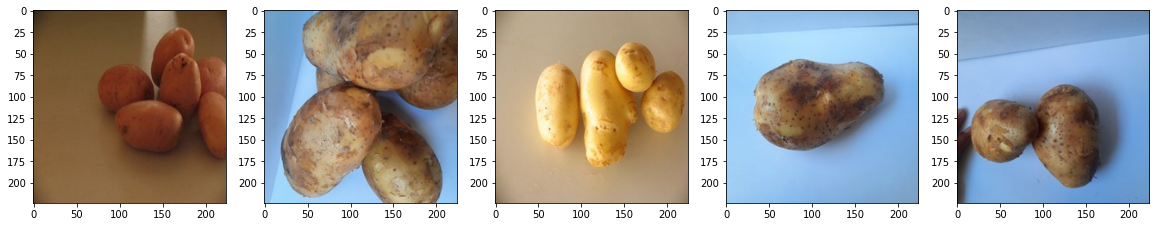

Pumpkin


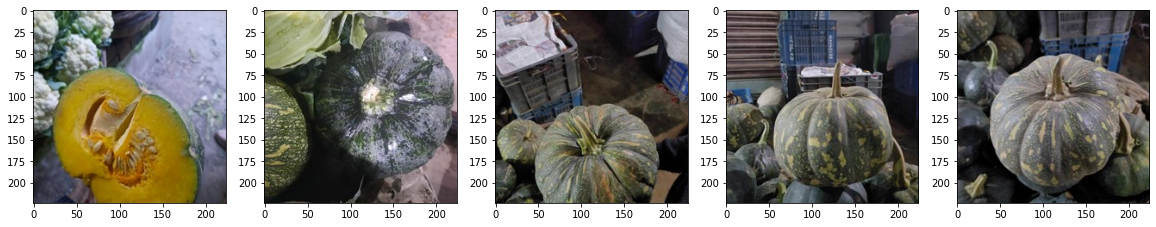

Radish


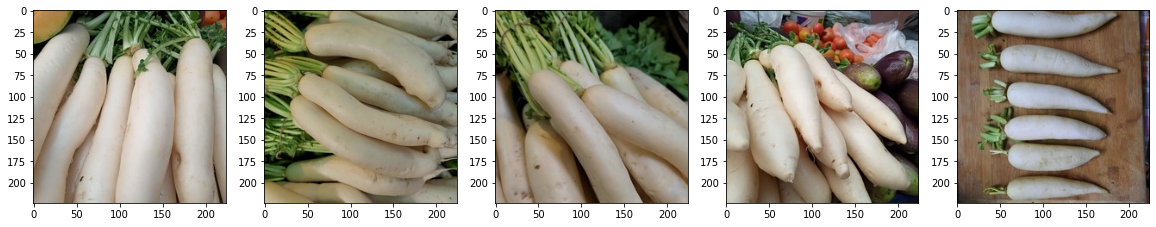

Tomato


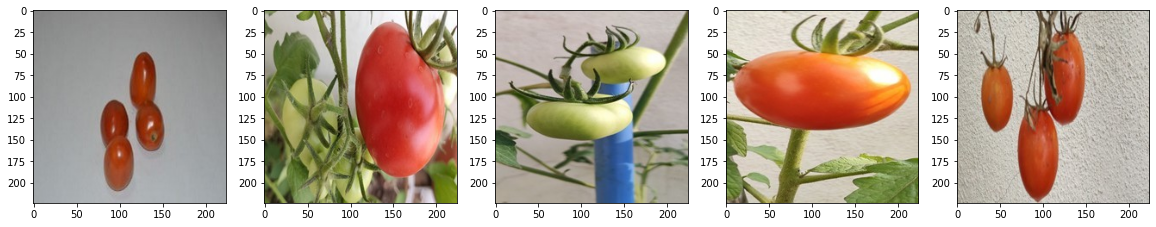

In [13]:
#checking image on directory
for  images in list_dir:
  print(images)
  class_dir = os.path.join(image_directory,images)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.imshow(img)
  plt.show()

Split Train Data

In [14]:
train_dir = './dt_vegetables/train/'
test_dir = './dt_vegetables/test/'
val_dir = './dt_vegetables/validation/'

In [15]:

IMAGE_SIZE=(224,224)

# Load training data
train_ds_ = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
    shuffle=True,
    
)

# Load test and validation data
test_ds = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
)

val_ds_ = image_dataset_from_directory(
    val_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
)



Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [29]:
print(train_dir)
print(val_ds_)

./dt_vegetables/train/
<BatchDataset shapes: ((None, 224, 224, 3), (None, 15)), types: (tf.float32, tf.float32)>


In [16]:
from tensorflow.keras.layers.experimental import preprocessing

In [17]:


# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = (
    train_ds_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
val_ds = (
    val_ds_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)



In [23]:
print(train_ds)
print(val_ds)

<PrefetchDataset shapes: ((None, 224, 224, 3), (None, 15)), types: (tf.float32, tf.float32)>
<PrefetchDataset shapes: ((None, 224, 224, 3), (None, 15)), types: (tf.float32, tf.float32)>


In [19]:
model = tf.keras.models.Sequential([
    # Preprocessing
    preprocessing.RandomFlip('horizontal'), # flip left-to-right
    preprocessing.RandomContrast(0.5), # contrast change by up to 50%
    
    
    # Block One
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same',
                  input_shape=[224, 224, 3]),
    tf.keras.layers.MaxPool2D(),

    # Block Two
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(),

    # Block Three
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same', input_shape=[224, 224, 3]),
    tf.keras.layers.MaxPool2D(),

    
    # Head
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation='sigmoid'),
])

In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    # YOUR CODE HERE: Add loss and metric
    loss= tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy'],
)

In [24]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
)

Epoch 1/10
469/469 [==============================] - 1650s 3s/step - loss: 2.3514 - accuracy: 0.2303 - val_loss: 1.9396 - val_accuracy: 0.3557
Epoch 2/10
469/469 [==============================] - 1572s 3s/step - loss: 1.7726 - accuracy: 0.4290 - val_loss: 1.2658 - val_accuracy: 0.5847
Epoch 3/10
469/469 [==============================] - 1570s 3s/step - loss: 1.1439 - accuracy: 0.6389 - val_loss: 0.8343 - val_accuracy: 0.7363
Epoch 4/10
469/469 [==============================] - 1598s 3s/step - loss: 0.7094 - accuracy: 0.7738 - val_loss: 0.6124 - val_accuracy: 0.8103
Epoch 5/10
469/469 [==============================] - 1553s 3s/step - loss: 0.5071 - accuracy: 0.8434 - val_loss: 0.7018 - val_accuracy: 0.7860
Epoch 6/10
469/469 [==============================] - 1815s 4s/step - loss: 0.3647 - accuracy: 0.8869 - val_loss: 0.6489 - val_accuracy: 0.8000
Epoch 7/10
469/469 [==============================] - 2085s 4s/step - loss: 0.2905 - accuracy: 0.9093 - val_loss: 0.5522 - val_accuracy:

In [26]:
model.save('model_inceptionV3_epoch5.h5')

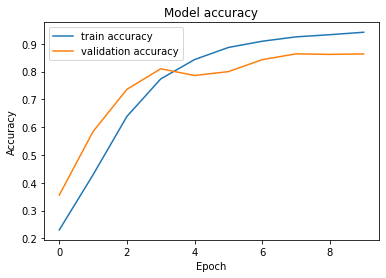

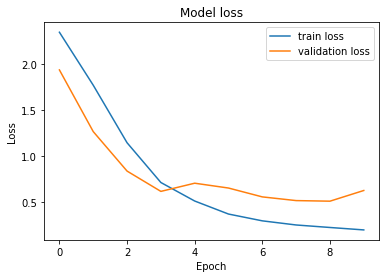

In [27]:
def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()
    
def plot_loss(history):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()
    
plot_accuracy(history)
plot_loss(history)

In [ ]:
prediksi = model.predict()